
# Multivariate Functional Principal Components Analysis

This notebook shows how to perform an multivariate functional principal
components analysis on an example dataset.


In [1]:
# Author: Zara Waheed <zara95@bu.edu>
# License: MIT

import matplotlib.pyplot as plt
import pandas as pd

from FDApy.representation.functional_data import MultivariateFunctionalData
from FDApy.preprocessing.dim_reduction.fpca import MFPCA
from FDApy.visualization.plot import plot
from FDApy.misc.loader import read_csv

In [2]:
def wf(x):
    return '/Users/zarawaheed/Documents/BostonUniversity/MA679/Final Project/Data/' + x

Load the data as DenseFunctionalData.



In [3]:
V_GRF_stance_N = read_csv(wf('V_GRF_stance_N.csv'))
ML_GRF_stance_N = read_csv(wf('ML_GRF_stance_N.csv'))
AP_GRF_stance_N = read_csv(wf('AP_GRF_stance_N.csv'))

#ML_GRF_stance_N = ML_GRF_stance_N.reset_index()
#AP_GRF_stance_N = AP_GRF_stance_N.reset_index()

In [4]:
# Create multivariate functional data

GRF = MultivariateFunctionalData([AP_GRF_stance_N, ML_GRF_stance_N, V_GRF_stance_N])

Perform a multivariate functional PCA and explore the results.



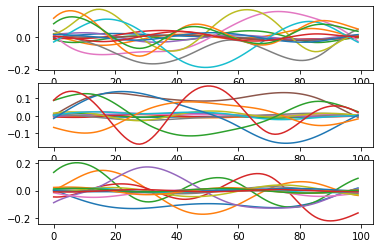

In [6]:
# Perform multivariate FPCA
mfpca = MFPCA(n_components=[0.99, 0.95, 0.99])
mfpca.fit(GRF, method='NumInt')

# Plot the results of the FPCA (eigenfunctions)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
_ = plot(mfpca.basis[0], ax=ax1)
_ = plot(mfpca.basis[1], ax=ax2)
_ = plot(mfpca.basis[2], ax=ax3)

In [7]:
#GRF.explained_variance_ratio_
#FDApy.preprocessing.dim_reduction.fpca.MFPCA
mfpca.basis

Multivariate functional data object with 3 functions of 14 observations.

Compute the scores of the dailyTemp data into the eigenfunctions basis using
numerical integration.



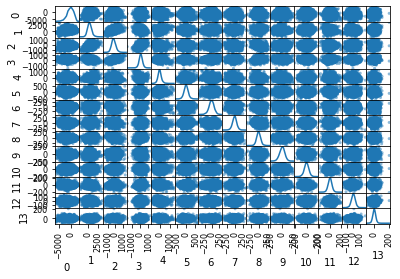

In [8]:
# Compute the scores
GRF_proj = mfpca.transform(GRF)

# Plot the projection of the data onto the eigenfunctions
_ = pd.plotting.scatter_matrix(pd.DataFrame(GRF_proj), diagonal='kde')

Then, we can test if the reconstruction of the data is good.



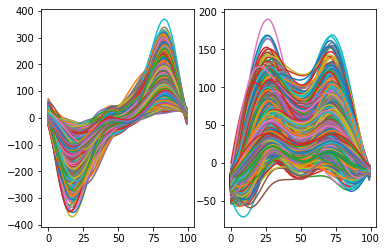

In [9]:
# Test if the reconstruction is good.
GRF_reconst = mfpca.inverse_transform(GRF_proj)

# Plot the reconstructed curves
fig, (ax1, ax2) = plt.subplots(1, 2)
_ = plot(GRF_reconst[0], ax=ax1)
_ = plot(GRF_reconst[1], ax=ax2)

In [10]:
GRF_proj

array([[   92.57696333,  -726.929977  ,  -576.90955199, ...,
            7.74681044,   -34.55461228,    15.07659564],
       [  229.25017808,  -903.28761876,  -773.00029831, ...,
           -8.89852681,   -41.69882923,    22.900628  ],
       [  395.41789012, -1071.94679419,  -796.18828296, ...,
          -20.5082718 ,   -64.43502198,    29.59748155],
       ...,
       [ 1588.1568721 ,   696.98654678,  -261.93792496, ...,
          -15.85246464,    -6.23824329,    12.14556153],
       [ 1630.69372157,   696.3578059 ,  -141.95364692, ...,
          -17.8683056 ,    25.42343776,    27.00845905],
       [ 1739.9006248 ,   578.18835209,  -428.18099703, ...,
          -38.4557444 ,   -22.82371314,    18.77103673]])

In [11]:
GRF_reconst

Multivariate functional data object with 3 functions of 15695 observations.

In [12]:
def MSE(original, reconstructed)
    
    diff = original - reconstructed
    mse = sum(diff)/(diff.shape[0]*diff.shape[1])
    return mse

SyntaxError: invalid syntax (3612405751.py, line 1)

### Calculate MSE

In [26]:
V_GRF_reconst = pd.DataFrame(GRF_reconst[2].values)
V_GRF_reconst_array = V_GRF_reconst.values.flatten()

V_GRF_stance_N_df = pd.DataFrame(V_GRF_stance_N.values)
V_GRF_stance_N_df_array = V_GRF_stance_N_df.values.flatten()

In [27]:
AP_GRF_reconst = pd.DataFrame(GRF_reconst[0].values)
AP_GRF_reconst_array = AP_GRF_reconst.values.flatten()

AP_GRF_stance_N_df = pd.DataFrame(AP_GRF_stance_N.values)
AP_GRF_stance_N_df_array = AP_GRF_stance_N_df.values.flatten()

In [28]:
ML_GRF_reconst = pd.DataFrame(GRF_reconst[1].values)
ML_GRF_reconst_array = ML_GRF_reconst.values.flatten()

ML_GRF_stance_N_df = pd.DataFrame(ML_GRF_stance_N.values)
ML_GRF_stance_N_df_array = ML_GRF_stance_N_df.values.flatten()

In [29]:
# Define function for MSE

def mse(array1,array2):
    diff = array1 - array2
    sqdiff = diff**2
    n = len(sqdiff)
    
    sum_sqdiff = sum(sqdiff)
    return sum_sqdiff/n

In [41]:
mse(V_GRF_stance_N_df_array, V_GRF_reconst_array)

1799.0560845353427

In [42]:
mse(AP_GRF_stance_N_df_array, AP_GRF_reconst_array)

251.85529439162045

In [43]:
mse(ML_GRF_stance_N_df_array, ML_GRF_reconst_array)

89.24421036617343

In [46]:
sum((AP_GRF_stance_N_df_array - AP_GRF_reconst_array)**2)/1569500

251.85529439162045